<a href="https://colab.research.google.com/github/ketanvaidya25/Malaria-Cell-Classifier/blob/main/MalariaCellClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Malaria Cell Classifier notebook. It takes input a cell and the categorizes it into uninfected or parasitized by malaria.
First we will call all the libraries we require for creating the model.

In [7]:
%tensorflow_version 1.x
from PIL import Image
import os
import numpy as np
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.python.framework import ops
from keras.utils import to_categorical
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


The Malaria Cell dataset which is available on Kaggle is divided into two folders namely 'Parasitized' and 'Uninfected', but for the model we will need Train and Test Datasets. We will now create a directory on Google Drive for our training set images with two labeled empty folders parasitized and uninfected.


In [ ]:
train_dir = "/train"
os.makedirs(train_dir)
labels = "parasitized uninfected"
labels = labels.split()
for label in labels:
  os.makedirs(train_dir + "/" + f"{label}")  

Similarily we will create a empty Test directory using the same labels which we used for Train directory.

In [ ]:
test_dir = "/content/drive/My Drive/MalariaCellClassifier/test"
os.makedirs(test_dir)

for label in labels:
  os.makedirs(test_dir + "/" + f"{label}")

FileExistsError: ignored

Defining some important directories which we will be using throughout our code.

In [ ]:
source1 = "/content/drive/My Drive/MalariaCellClassifier/train"
source2 = "/content/drive/My Drive/Malaria"
dest1 = "/content/drive/My Drive/MalariaCellClassifier/train/parasitized"
dest2 = "/content/drive/My Drive/MalariaCellClassifier/train/uninfected"
dest3 = "/content/drive/My Drive/MalariaCellClassifier/test/parasitized"
dest4 = "/content/drive/My Drive/MalariaClassifier/train/uninfected"




In [ ]:
import shutil
import random
l= ['train','test']
test_size = 0.2
labeldata = ['Parasitized', 'Uninfected']
for j in l:
  for i in range(2):
    files = os.listdir(source1 + '/' + labels[i])
    

    if (j=="test"):
      split_files = files[0:int(test_size*len(files))]
      
    if (j=='train'):
      split_files = files[int(test_size*len(files)):]

    dest = "/content/drive/My Drive/MalariaCellClassifier/" + f"{j}" + '/' + f"{labels[i]}"
    
    for f in split_files:
      shutil.move(source1 + '/' + f"{labels[i]}" + '/' + f, dest + '/')

      




NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
instances = []
for foldername in os.listdir(source1):
 for filename in os.listdir(source1 + '/' + foldername):
  if (filename != 'Thumbs.db'):
    if (filename != 'C78P39ThinF_IMG_20150606_104936_cell_147.png' ):
     if ( filename != 'P48ThinF_IMG_20150820_132514_cell_94.png'):
      instances.append(np.array(Image.open(dest1 + '/' + filename)))
      for i in range(1,2000):
       if (len(instances)==10*i):
        print(10*i)



10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

FileNotFoundError: ignored

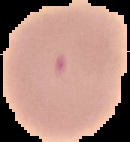

In [ ]:
Image.open('/content/drive/My Drive/MalariaCellClassifier/train/parasitized/C33P1thinF_IMG_20150619_115740a_cell_163.png')

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/MalariaCellClassifier/train",target_size=(64,64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/MalariaCellClassifier/test',target_size=(64,64), batch_size=32, class_mode='binary')


Found 25576 images belonging to 2 classes.
Found 1277 images belonging to 2 classes.


In [ ]:


def logisticmodel(input_shape = (64,4,3)):

 X_input = Input(input_shape)
 X = Flatten()(X_input)

 X = Dense(1, activation='sigmoid')(X)

 model = Model(inputs=X_input, outputs=X)

 return model




In [ ]:
model = logisticmodel(input_shape=(64,64,3))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit_generator(train_generator, validation_data=test_generator, epochs=2)

Epoch 1/2


KeyboardInterrupt: ignored

In [8]:
def convolutionalmodel(input_shape, filters):

  F1,F2,F3 = filters

  X_input = Input(input_shape)

  X = ZeroPadding2D((3,3))(X_input)

  X = Conv2D(filters=F1, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3, name='bn_1')(X)
  X = Activation('relu')(X)


  X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  
  X = Conv2D(filters=F3, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F1, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3, name='bn_2')(X)
  X = Activation('relu')(X)


  X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  
  X = Conv2D(filters=F3, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F1, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F3, kernel_size=(3,3), strides=(2,2), padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = AveragePooling2D((2,2))(X)

  X = Flatten()(X)

  X = Dense(50, activation = 'relu')(X)
  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_input, outputs=X)

  return model





In [9]:
model = convolutionalmodel(input_shape=(64,64,3), filters=[64,64,256])
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss="binary_crossentropy", metrics=['accuracy'])


In [11]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=4)

Epoch 1/4
800/800 [==============================] - 106s 132ms/step - loss: 0.1015 - accuracy: 0.9650 - val_loss: 0.1393 - val_accuracy: 0.9554
Epoch 2/4
800/800 [==============================] - 105s 132ms/step - loss: 0.0976 - accuracy: 0.9660 - val_loss: 0.1271 - val_accuracy: 0.9616
Epoch 3/4
800/800 [==============================] - 105s 132ms/step - loss: 0.0932 - accuracy: 0.9675 - val_loss: 0.1454 - val_accuracy: 0.9514
Epoch 4/4
800/800 [==============================] - 105s 132ms/step - loss: 0.0889 - accuracy: 0.9688 - val_loss: 0.1662 - val_accuracy: 0.9460


In [ ]:
def identity_block(X, f, filters):

  F1, F2 = filters

  X_shortcut = X

  X = Conv2D(filters=F1, kernel_size = (1,1), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F2, kernel_size = (f,f), strides=(1,1), padding='same')(X)
  X = BatchNormalization(axis=3)(X)

  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X
                      


In [ ]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(1)
    A_prev = tf.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 2, filters = [2, 6])
    test.run(tf.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.         0.24131799 2.3407197  1.4769857  0.         1.9257565 ]


In [ ]:
def convolutional_block(X, f, filters, s = 2):

  F1, F2 = filters

  X_shortcut = X

  X = Conv2D(filters=F1, kernel_size = (1,1), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters=F2, kernel_size = (f,f), strides=(1,1), padding='same')(X)
  X = BatchNormalization(axis=3)(X)

  X_shortcut = Conv2D(filters=F2, kernel_size = (1,1), strides = (1,1), padding = 'valid')(X_shortcut)
  X_shortcut = BatchNormalization(axis=3)(X_shortcut)

  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

In [ ]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(1)
    A_prev = tf.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = convolutional_block(A_prev, f = 2, filters = [2, 6])
    test.run(tf.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [1.1388335 1.9355179 0.9873162 0.        0.        0.       ]


In [ ]:
def resNet(input_shape):

  X_input = Input(input_shape)

  X = ZeroPadding2D((3,3))(X_input)

  X = Conv2D(64, (7,7), strides=(2,2))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
                         
  X = MaxPooling2D((3,3), strides=(2,2))(X)

  X = convolutional_block(X, f = 3, filters = [64,256])
  X = identity_block(X, f =3, filters = [64,256])

  X = convolutional_block(X, f = 3, filters = [128,512])
  X = identity_block(X, f =3, filters = [128,512])

  X = convolutional_block(X, f = 3, filters = [256,1024])
  X = identity_block(X, f =3, filters = [256,1024])

  X = MaxPooling2D((2,2))(X)

  X = Flatten()(X)

  X = Dense(1, activation='softmax')(X)

  model = Model(inputs = X_input, outputs = X)

  return model 


In [ ]:
model = resNet(input_shape=(64,64,3))
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=2)

Epoch 1/2
800/800 [==============================] - 63s 79ms/step - loss: 7.6624 - accuracy: 0.5000 - val_loss: 7.8875 - val_accuracy: 0.4996
Epoch 2/2
800/800 [==============================] - 62s 77ms/step - loss: 7.6660 - accuracy: 0.5000 - val_loss: 7.3617 - val_accuracy: 0.4996


In [1]:
!git init

Initialized empty Git repository in /content/.git/


In [4]:
!git config --global user.email "ketan.vaidya25@gmail.com"
!git config --global user.name "Ketan Vaidya"

In [ ]:
!git add 